In [31]:
import pandas as pd
import os

## Merge the datasets

In [32]:
df = pd.read_csv("filepath.csv")

files = [file for file in os.listdir('folderpath')]

final_df = pd.DataFrame()

for file in files:
    df=pd.read_csv("folderpath"+file)
    final_df = pd.concat([final_df,df])
    
final_df.to_csv('all_data.csv', index=False)

In [33]:
fdf=pd.read_csv('/Users/yashkarande/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Output/all_data.csv')

In [34]:
fdf

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


Clean the data

In [35]:
fdf.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [36]:
fdf.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [37]:
null_df=fdf[fdf.isna().any(axis=1)]
null_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
fdf=fdf.dropna(how='all')

In [39]:
fdf.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [40]:
fdf.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

#### Question 1: What was the best month for sales How much money was earned in that month?

In [41]:
fdf.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [42]:
fdf['Order Date']=pd.to_datetime(fdf['Order Date'])
fdf['Order Month']=fdf['Order Date'].dt.month

ParserError: Unknown string format: Order Date

In [43]:
fdf['Order Date'].astype(str)

0         04/19/19 08:46
2         04/07/19 22:30
3         04/12/19 14:38
4         04/12/19 14:38
5         04/30/19 09:27
               ...      
186845    09/17/19 20:56
186846    09/01/19 16:00
186847    09/23/19 07:39
186848    09/19/19 17:30
186849    09/30/19 00:18
Name: Order Date, Length: 186305, dtype: object

In [44]:
type(fdf['Order Date'])

pandas.core.series.Series

In [45]:
fdf['Order Month']=fdf['Order Date'].str[:2]

/var/folders/m6/qgmvxk1d17g01z7vr6rqxmh00000gn/T/ipykernel_1459/3766196916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf['Order Month']=fdf['Order Date'].str[:2]


In [46]:
fdf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [47]:
fdf['Order Month'].unique()

array(['04', '05', 'Or', '08', '09', '12', '01', '02', '03', '07', '06',
       '11', '10'], dtype=object)

In [48]:
fdf.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Order Month         0
dtype: int64

In [50]:
fdf['Order Month'].astype(int)

ValueError: invalid literal for int() with base 10: 'Or'

In [51]:
fdf=fdf[fdf['Order Date'].str[:2]!='Or']                    #removing rows which have errors('Or') in Order Date

In [52]:
fdf['Order Month'].unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

In [53]:
fdf['Sales'] = fdf['Quantity Ordered'] * fdf['Price Each']

TypeError: can't multiply sequence by non-int of type 'str'

In [58]:
fdf['Quantity Ordered']=pd.to_numeric(fdf['Quantity Ordered'])          #convert to variable from str to numeric for calculation

In [59]:
fdf['Price Each']=pd.to_numeric(fdf['Price Each'])

In [60]:
fdf['Sales'] = fdf['Quantity Ordered'] * fdf['Price Each']

In [61]:
fdf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99


In [62]:
s1=fdf.groupby('Order Month')['Sales'].sum()

In [63]:
s1

Order Month
01    1822256.73
02    2202022.42
03    2807100.38
04    3390670.24
05    3152606.75
06    2577802.26
07    2647775.76
08    2244467.88
09    2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

In [64]:
import matplotlib.pyplot as plt


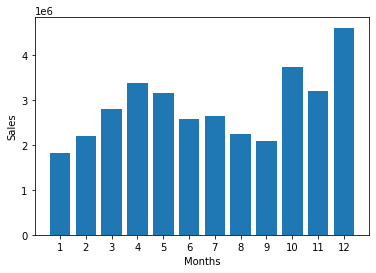

In [65]:
months=range(1,13)

plt.bar(months,s1)
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

### December had the most sales worth $4613443.34

#### Question 2: which US city had the highest number of sales

Add city column

In [66]:
fdf['City']=fdf['Purchase Address'].apply(lambda x: x.split(',')[1])
 

In [67]:
fdf['State']=fdf['Purchase Address'].apply(lambda x: x.split(',')[2])

In [68]:
fdf['State']=fdf['State'].str[1:3]

In [69]:
fdf['City']=fdf['City']+"("+fdf['State']+")"

In [70]:
fdf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Sales,City,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas(TX),TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston(MA),MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles(CA),CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles(CA),CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles(CA),CA


In [71]:
cs=fdf.groupby(['City']).sum()
cs

,Quantity Ordered,Price Each,Sales
City,,,
Atlanta(GA),16602,2779908.20,2795498.58
Austin(TX),11153,1809873.61,1819581.75
Boston(MA),22528,3637409.77,3661642.01
Dallas(TX),16730,2752627.82,2767975.40
Los Angeles(CA),33289,5421435.23,5452570.80
New York City(NY),27932,4635370.83,4664317.43
Portland(ME),2750,447189.25,449758.27
Portland(OR),11303,1860558.22,1870732.34
San Francisco(CA),50239,8211461.74,8262203.91


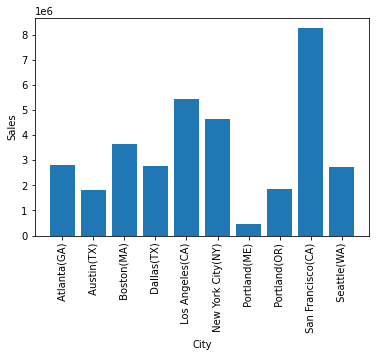

In [72]:
cities=[city for city, df in fdf.groupby('City')]            # to get list in same order as grouped data

plt.bar(cities,cs['Sales'])
plt.xticks(cities,rotation="vertical")
plt.xlabel('City')
plt.ylabel('Sales')
plt.show()

### San Francisco made the most sales in the US

#### Question 3: What time should we display the ads to maximixe likelihood of customers buying the product?

In [73]:
#change to datetime object
fdf['Order Date']=pd.to_datetime(fdf['Order Date'])
fdf['Hour']=fdf['Order Date'].dt.hour

In [74]:
fdf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Sales,City,State,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas(TX),TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston(MA),MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles(CA),CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles(CA),CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles(CA),CA,9


In [75]:
hr=fdf.groupby('Hour')['Order ID'].count()
hr

Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Order ID, dtype: int64

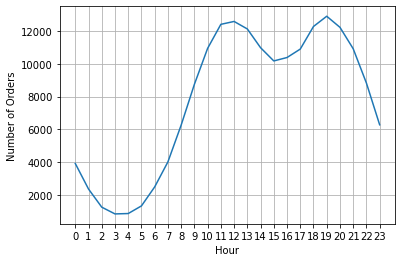

In [76]:
hours = [hour for hour, df in fdf.groupby('Hour')]

plt.plot(hours,hr)
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()

### Ads would be most effective during hours 11-13 and 18-20

#### Question 4: What products are most often sold together?

In [78]:
grp=fdf[fdf['Order ID'].duplicated(keep=False)]
grp.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Sales,City,State,Hour
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles(CA),CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles(CA),CA,14
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,600.00,Los Angeles(CA),CA,19
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,11.95,Los Angeles(CA),CA,19
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",04,99.99,Boston(MA),MA,11


In [79]:
grp['prod']=fdf.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
grp.head()

/var/folders/m6/qgmvxk1d17g01z7vr6rqxmh00000gn/T/ipykernel_1459/3046391935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grp['prod']=fdf.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Sales,City,State,Hour,prod
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles(CA),CA,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles(CA),CA,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,600.00,Los Angeles(CA),CA,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,11.95,Los Angeles(CA),CA,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",04,99.99,Boston(MA),MA,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [80]:
grp=grp[['Order ID', 'prod']].drop_duplicates()
grp.head()

,Order ID,prod
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [82]:
from itertools import combinations
from collections import Counter

count=Counter()

for row in grp['prod']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
print(count)

Counter({('iPhone', 'Lightning Charging Cable'): 1005, ('Google Phone', 'USB-C Charging Cable'): 987, ('iPhone', 'Wired Headphones'): 447, ('Google Phone', 'Wired Headphones'): 414, ('Vareebadd Phone', 'USB-C Charging Cable'): 361, ('iPhone', 'Apple Airpods Headphones'): 360, ('Google Phone', 'Bose SoundSport Headphones'): 220, ('USB-C Charging Cable', 'Wired Headphones'): 160, ('Vareebadd Phone', 'Wired Headphones'): 143, ('Lightning Charging Cable', 'Wired Headphones'): 92, ('Lightning Charging Cable', 'Apple Airpods Headphones'): 81, ('Vareebadd Phone', 'Bose SoundSport Headphones'): 80, ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 77, ('Apple Airpods Headphones', 'Wired Headphones'): 69, ('Lightning Charging Cable', 'USB-C Charging Cable'): 58, ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 55, ('Lightning Charging Cable', 'Lightning Charging Cable'): 54, ('Bose SoundSport Headphones', 'Wired Headphones'): 53, ('AA Batteries (4-pack)', 'Lightning Charging Cable')

### Products most commonly sold together

In [85]:
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

#### Question 5: Which product sold the most? Why do you think it sold the most?

In [86]:
pop_prod = fdf.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)
pop_prod

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64

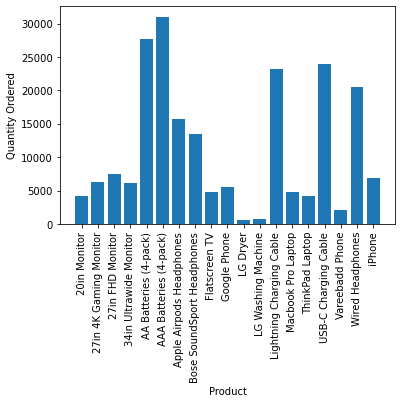

In [87]:
#plot 
prod_grp=fdf.groupby('Product')
quant_prod = prod_grp.sum()['Quantity Ordered']

products = [product for product, df in prod_grp]

plt.bar(products, quant_prod)
plt.xticks(products, rotation='vertical')
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.show()


#### Looks like cheaper itmes are sold most. Lets check this hypotheses

In [88]:
prod_price= fdf.groupby('Product')['Price Each'].mean().sort_values(ascending=True)
prod_price

Product
AAA Batteries (4-pack)           2.99
AA Batteries (4-pack)            3.84
USB-C Charging Cable            11.95
Wired Headphones                11.99
Lightning Charging Cable        14.95
Bose SoundSport Headphones      99.99
20in Monitor                   109.99
27in FHD Monitor               149.99
Apple Airpods Headphones       150.00
Flatscreen TV                  300.00
34in Ultrawide Monitor         379.99
27in 4K Gaming Monitor         389.99
Vareebadd Phone                400.00
Google Phone                   600.00
LG Washing Machine             600.00
LG Dryer                       600.00
iPhone                         700.00
ThinkPad Laptop                999.99
Macbook Pro Laptop            1700.00
Name: Price Each, dtype: float64

([<matplotlib.axis.XTick at 0x7fdb04305430>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

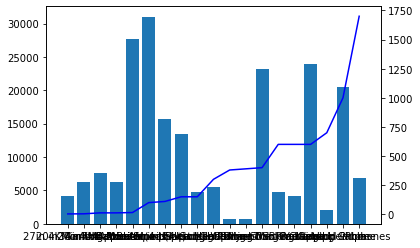

In [90]:
fig,ax1=plt.subplots()

ax2=ax1.twinx()

ax1.bar(products, quant_prod)
ax2.plot(products,prod_price,'b-')
plt.xticks(products, rotation='vertical')